# DMS single protein naive
Here I train a separate model for each dms experiment and use it to predict unseen mutations in the same protein. I use different positions along the protein in validation and training.

## Notes on hyperparam tuning

- max_depth
    - Not important
    - Fix at 6
- min_child_weigth
    - Fix at 0
- subsample
    - Fix at 0.6
- colsample_bytree
    - Fix at 1
- eta
    - Fix 0.011
- gamma
    - Don't go above 1
    - Narrow to 0.001-1, 0.1 seems best
    - Fix at 0.1
- lambda
    - Fix at 4
- alpha
    - Should be lower than 0.01
    - Fix at 0

## Visualizing the random search results

Here I visualize the results of the random search. First I load the dump that I obtained with my script and load the needed libraries.

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import joblib
import pandas as pd

dump_in = joblib.load('/home/saul/master_thesis_work/processing/dms/single_protein_models/naive/random_search_20210429-153946.joblib.xz')
corr_df = dump_in['data']
params_random_search = [el[1] for el in dump_in['params']]
del dump_in
len(corr_df), len(params_random_search)

(1120, 1120)

### Proportion of hyperparameters in the top N combinations

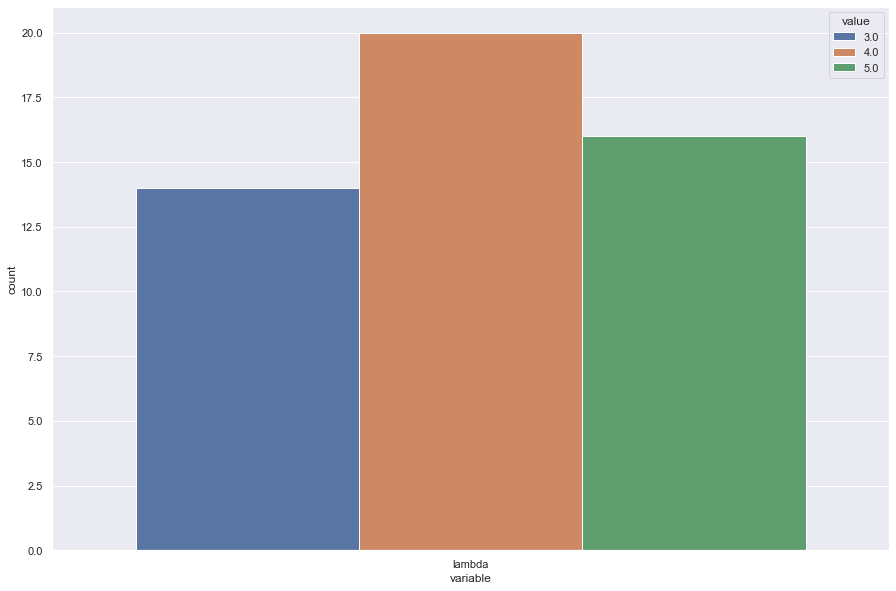

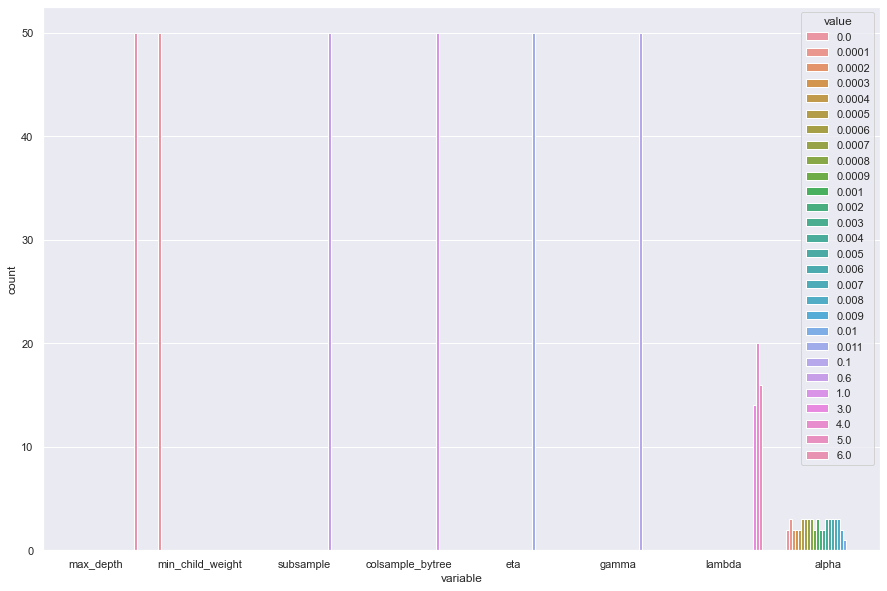

In [234]:
hyperparam_df = pd.DataFrame()
for name in corr_df.iloc[:50].index:
    param_index = int(name.split('_')[1])
    curr_params = pd.DataFrame(params_random_search[param_index], index=[param_index])
    hyperparam_df = hyperparam_df.append(curr_params)
hyperparam_df.drop(['objective', 'tree_method', 'nthread', 'num_rounds'], axis=1, inplace=True)

melted_df = hyperparam_df.melt()
var_to_show = 'lambda'
plt.figure(figsize=(15,10))
sns.countplot(data=melted_df[melted_df.variable == var_to_show], x='variable', hue='value')
plt.show()
plt.figure(figsize=(15,10))
sns.countplot(data=melted_df, x='variable', hue='value')
plt.show()

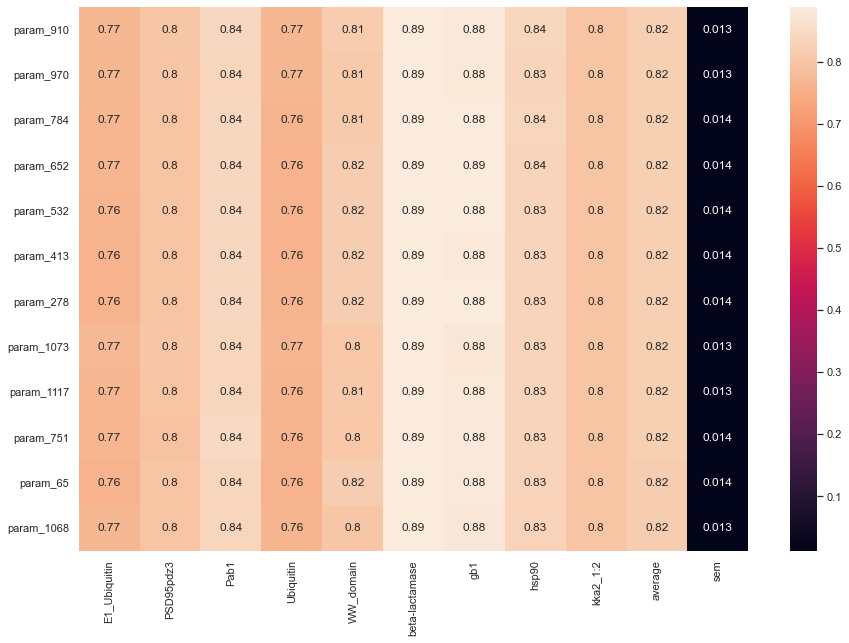

In [217]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_df.iloc[::100], annot=True)
_ = plt.yticks(rotation=0)

In [219]:
params_random_search[910]

{'max_depth': 6,
 'min_child_weight': 0,
 'subsample': 0.6,
 'colsample_bytree': 1,
 'eta': 0.011,
 'tree_method': 'hist',
 'objective': 'reg:squarederror',
 'nthread': 1,
 'gamma': 0.1,
 'lambda': 4,
 'alpha': 0.002,
 'num_rounds': 1000}

## Plotting the results with a specific set of hyperparams

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
import joblib

def plot_results(df_results):
    for curr_dataset in set(df_results.dms_id):
        for kind in ['validation', 'test']:
            y_pred = df_results[(df_results.dms_id == curr_dataset) & (df_results.kind == kind)].y_pred
            y_true = df_results[(df_results.dms_id == curr_dataset) & (df_results.kind == kind)].y_true
            is_wt = df_results[(df_results.dms_id == curr_dataset) & (df_results.kind == kind)].is_wt
            print('{} performance for dataset: {}'.format(kind, curr_dataset))
            print('test pearson:', stats.pearsonr(y_pred, y_true)[0])
            print('test spearman:', stats.spearmanr(y_pred, y_true)[0])
            print('test kendall:', stats.kendalltau(y_pred, y_true)[0])
            plt.close()
            sns.scatterplot(x=y_true[~is_wt],
                            y=y_pred[~is_wt],
                            marker='x')
            sns.scatterplot(x=y_true[is_wt],
                            y=y_pred[is_wt],
                            s=100,
                            alpha=0.5)
            plt.show()

dump_in = joblib.load('/home/saul/master_thesis_work/processing/dms/single_protein_models/naive/validation_and_test_20210429-214356.joblib.xz')
df_results = dump_in['data']
params_random_search = [el[1] for el in dump_in['params']]
del dump_in
len(df_results)

21842

validation performance for dataset: E1_Ubiquitin
test pearson: 0.7695898418711861
test spearman: 0.7075093769720001
test kendall: 0.520545672412204


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


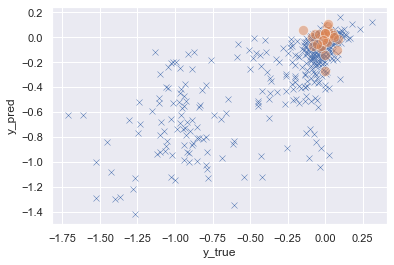

test performance for dataset: E1_Ubiquitin
test pearson: 0.8117954020431858
test spearman: 0.7021856289162031
test kendall: 0.518800503886687


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


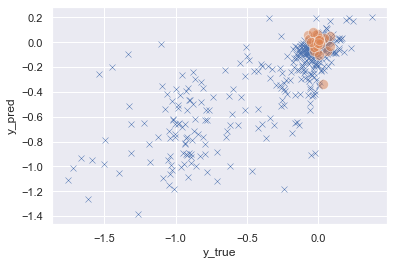

validation performance for dataset: gb1
test pearson: 0.8824383948349812
test spearman: 0.8548289498157423
test kendall: 0.6797484144656856


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


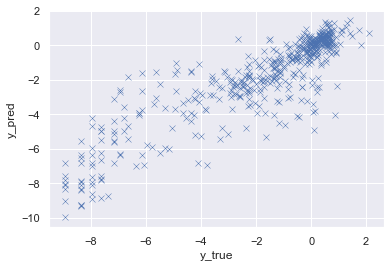

test performance for dataset: gb1
test pearson: 0.9019730232872077
test spearman: 0.8838888119436371
test kendall: 0.708336510224811


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


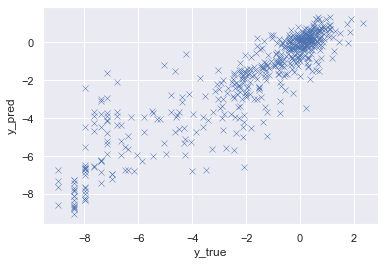

validation performance for dataset: beta-lactamase
test pearson: 0.8881105447841098
test spearman: 0.8534913012322053
test kendall: 0.6670380726740391


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


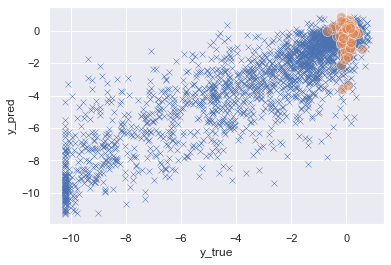

test performance for dataset: beta-lactamase

/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)



test pearson: 0.902608552166482
test spearman: 0.8707983144492316
test kendall: 0.6880190327331109


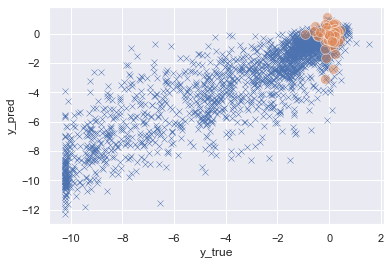

validation performance for dataset: WW_domain
test pearson: 0.8144690029090448


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


test spearman: 0.7843395232389538
test kendall: 0.586283057250799


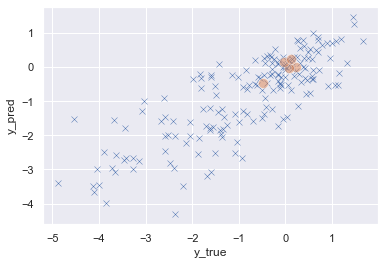

test performance for dataset: WW_domain
test pearson: 0.7194788753399357
test spearman: 0.7113033520639802
test kendall: 0.5214766258409522


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


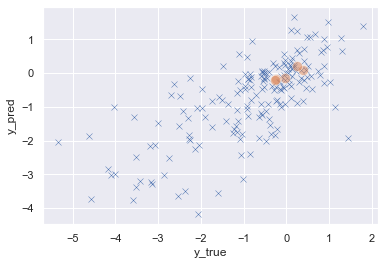

validation performance for dataset: hsp90
test pearson: 0.8376359492947577
test spearman: 0.6459785789554883
test kendall: 0.4738203372758496


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


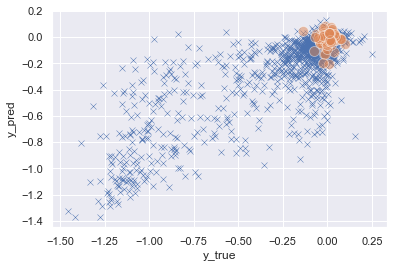

test performance for dataset: hsp90
test pearson: 0.85317606352398
test spearman: 0.6923075096758693
test kendall: 0.5138188187406335


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


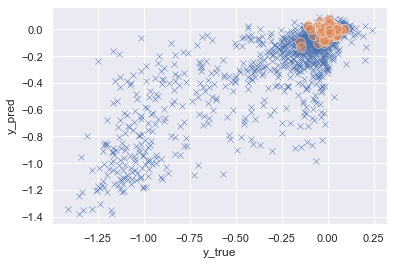

validation performance for dataset: kka2_1:2
test pearson: 0.7967869670608048
test spearman: 0.7900412437233876
test kendall: 0.5873693528267244


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


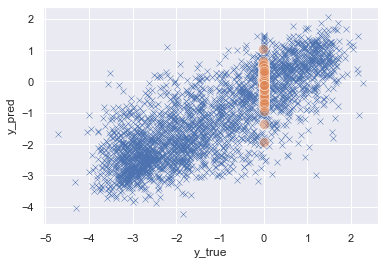

test performance for dataset: kka2_1:2
test pearson: 0.7958813604554306
test spearman: 0.7919672703483184
test kendall: 0.5930147101040547


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


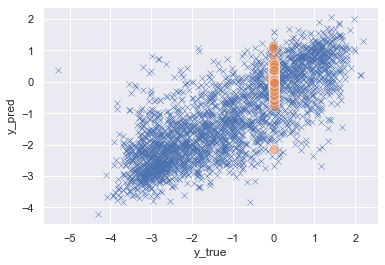

validation performance for dataset: Pab1
test pearson: 0.8426511510195548
test spearman: 0.794761959555817
test kendall: 0.5967115853712187


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


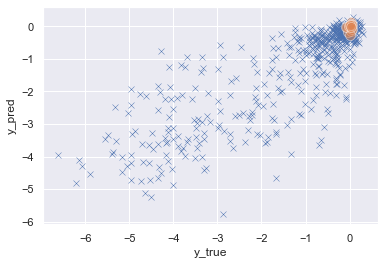

test performance for dataset: Pab1
test pearson: 0.825946424866967
test spearman: 0.7888979244720498
test kendall: 0.5952250843263382


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


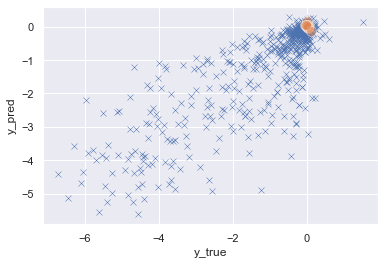

validation performance for dataset: Ubiquitin
test pearson: 0.7688233267258524
test spearman: 0.7923042857359691
test kendall: 0.5983340214693714


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


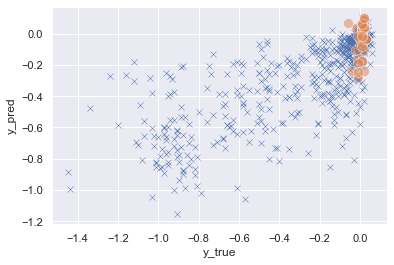

test performance for dataset: Ubiquitin
test pearson: 0.8123815099708553
test spearman: 0.8185158634920265
test kendall: 0.627615663811727


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


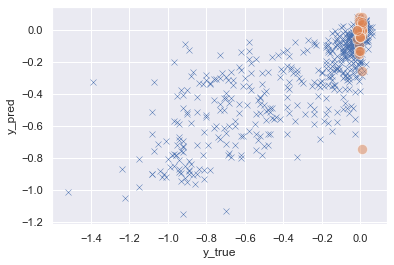

validation performance for dataset: PSD95pdz3
test pearson: 0.7984248063149937
test spearman: 0.7561441563764535
test kendall: 0.5700519239044161


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


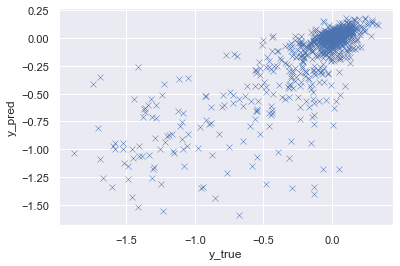

test performance for dataset: PSD95pdz3
test pearson: 0.7696325811326278
test spearman: 0.7683555213101294
test kendall: 0.5831530559421167


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


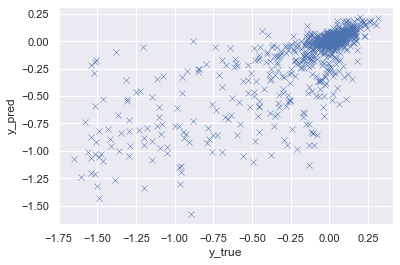

In [3]:
plot_results(df_results)